##  Решение уравнения Лапласа

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Lab4(object):
    def __init__(self, number_of_rows, accuracy, input_tempreture_field=None):
        self.__number_of_rows = number_of_rows+1
        self.__accuracy = accuracy
        self._input_tempreture_field = np.zeros((self.__number_of_rows, self.__number_of_rows))
        if input_tempreture_field is None:
            for i in range(self.__number_of_rows):
                for j in range(self.__number_of_rows):
                    print("Введите значение сегмента поля")
                    self._input_tempreture_field[i][j] = int(input())
        else:
            self._input_tempreture_field = input_tempreture_field
        for i in range(1, self.__number_of_rows-1, 1):
            for j in range(1, self.__number_of_rows-1, 1):
                self._input_tempreture_field[i][j] = 0.
    
    @staticmethod
    def __calculate_new_tempreture_segment_value(tempreture_field, i, j):
        new_value = (tempreture_field[i-1][j] + tempreture_field[i+1][j] + tempreture_field[i][j-1] + tempreture_field[i][j+1])/4.
        return new_value
    
    def __solve(self):
        check_variable = 100.
        while check_variable > self.__accuracy:
            check_variable = 0.
            for i in range(1, self.__number_of_rows-1, 1):
                for j in range(1, self.__number_of_rows-1, 1):
                    previous_value = self._input_tempreture_field[i][j]
                    self._input_tempreture_field[i][j] =\
                                                    self.__calculate_new_tempreture_segment_value(self._input_tempreture_field, i, j)
                    delta = np.abs(previous_value - self._input_tempreture_field[i][j])
                    if delta > check_variable:
                        check_variable = delta
        return self._input_tempreture_field.copy()
    
    def __print_results(self):
        print("Полученное поле")
        print(self._input_tempreture_field)
    
    def main(self):
        self.__solve()
        self.__print_results()
        i = np.arange(0, self.__number_of_rows+1, 1)
        j = np.arange(0, self.__number_of_rows+1, 1)
        plt.pcolormesh(i,j,self._input_tempreture_field)
        plt.show()

Полученное поле
[[50.         60.         65.         70.        ]
 [40.         49.58318996 58.04159498 67.        ]
 [30.         40.29159498 50.58329749 61.        ]
 [20.         31.         43.         55.        ]]


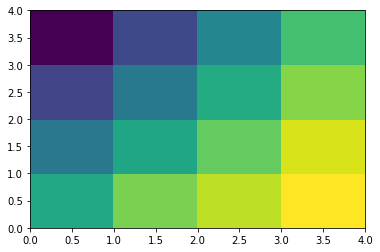

In [9]:
number_of_rows = 3
accuracy = 0.001
input_tempreture_field = np.array([[50., 60., 65., 70.], 
                                   [40., 0., 0.,  67.],
                                   [30, 0., 0., 61.],
                                   [20., 31., 43., 55.]])
test = Lab4(number_of_rows=number_of_rows, input_tempreture_field=input_tempreture_field, accuracy=accuracy)
test.main()